# EXPLORATORY DATA ANALYSIS for DS Salary Prediction Project
By Dev Patel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# Extracting the cleaned data from csv
df = pd.read_csv('DS_salary_data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,1,0,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,1,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,10,1,0,1,0,1,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,55,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,1,0,0,0,1,data scientist,na,2728,3


In [3]:
# Info of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [4]:
# Statistical description of the df
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [5]:
# Mean of the avg salaries of all jobs in the df
df.describe()['avg_salary']['mean'].round(2)

100.63

In [6]:
# Top ten highest paying jobs
df.nlargest(10, columns='avg_salary')[['company_txt','avg_salary']]

,company_txt,avg_salary
354,Liberty Mutual Insurance,254.0
528,Liberty Mutual Insurance,254.0
708,Liberty Mutual Insurance,254.0
103,Gallup,237.5
429,Sage Intacct,232.5
176,CA-One Tech Cloud,225.0
266,CA-One Tech Cloud,225.0
613,Grand Rounds,221.5
195,Credit Sesame,205.0
330,Credit Sesame,205.0


In [7]:
# Top ten highest paying jobs' sector
df.nlargest(10, columns='avg_salary')['Sector']

354                 Insurance
528                 Insurance
708                 Insurance
103         Business Services
429    Information Technology
176    Information Technology
266    Information Technology
613               Health Care
195    Information Technology
330    Information Technology
Name: Sector, dtype: object

<AxesSubplot:xlabel='Rating', ylabel='Count'>

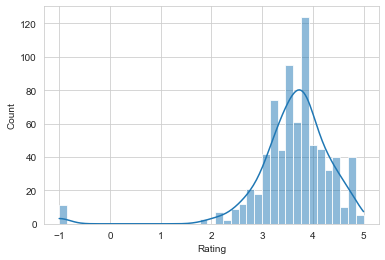

In [8]:
# Histogram for the ratings of all companies in the df
sns.histplot(data=df, x='Rating', kde=True)

<AxesSubplot:xlabel='avg_salary', ylabel='Count'>

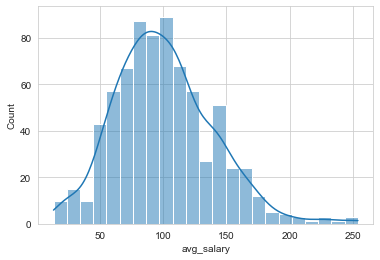

In [9]:
# Histogram of the avg_salary column
sns.histplot(data=df, x='avg_salary', kde=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

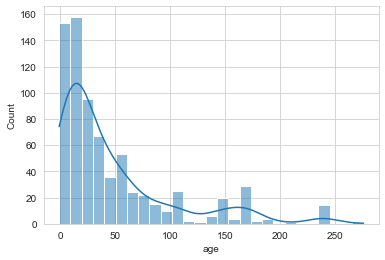

In [10]:
# Histogram for the age of companies
sns.histplot(data=df, x='age', kde=True)

<AxesSubplot:>

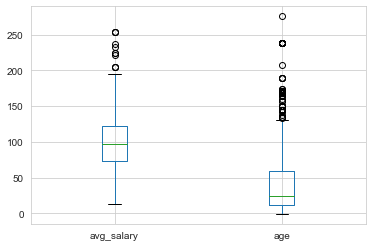

In [11]:
# Boxplot for 'avg_salary' and 'age' columns
df.boxplot(column=['avg_salary', 'age'])

In [12]:
# Correlation between the 'avg_salary', 'age', 'Rating', and 'desc_len' columns
corr = df[['avg_salary', 'age', 'Rating', 'desc_len']].corr()
corr

,avg_salary,age,Rating,desc_len
avg_salary,1.000000,0.019655,0.013492,0.078808
age,0.019655,1.000000,0.021655,0.163911
Rating,0.013492,0.021655,1.000000,-0.012281
desc_len,0.078808,0.163911,-0.012281,1.000000


<AxesSubplot:>

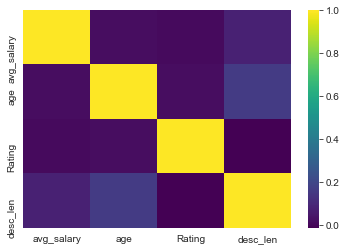

In [13]:
# Heatmap of the correlation above
sns.heatmap(corr, cmap='viridis')

BarPlot for Location:


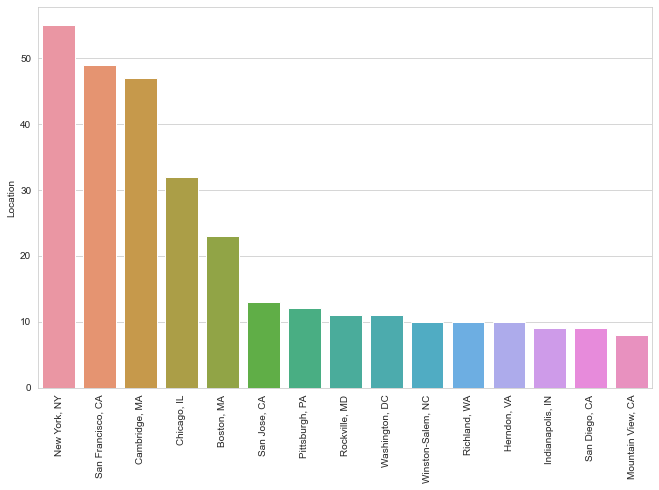

BarPlot for Headquarters:


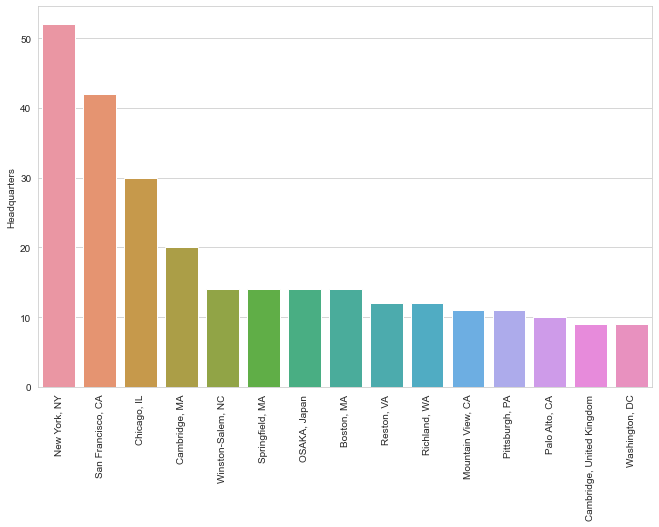

BarPlot for Size:


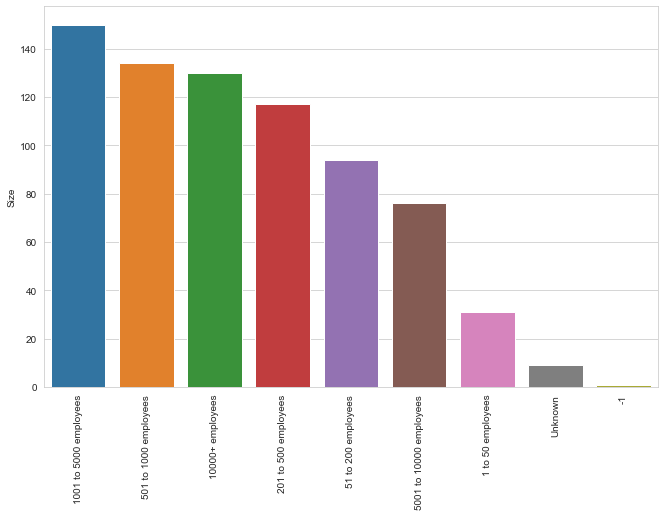

BarPlot for Type of ownership:


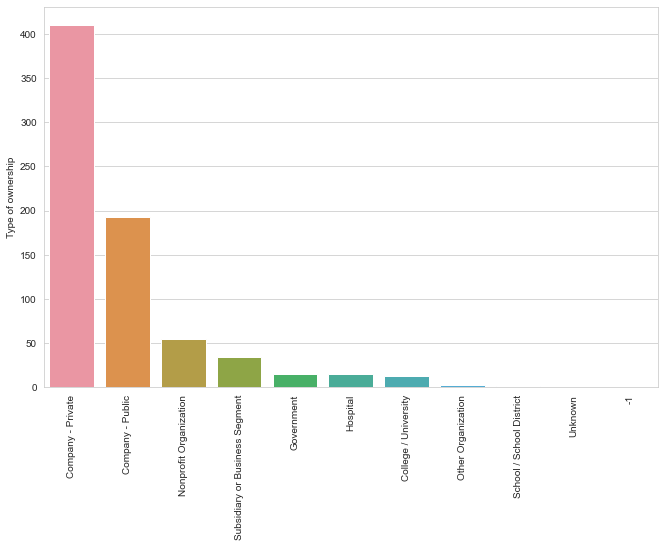

BarPlot for Industry:


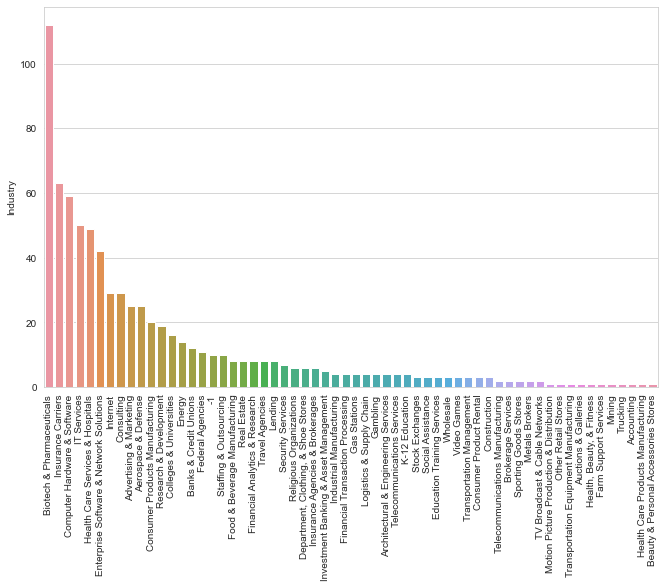

BarPlot for Sector:


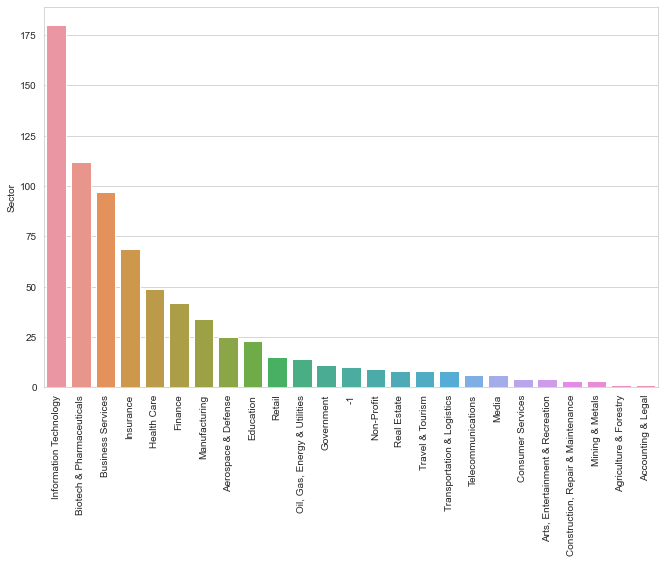

BarPlot for Revenue:


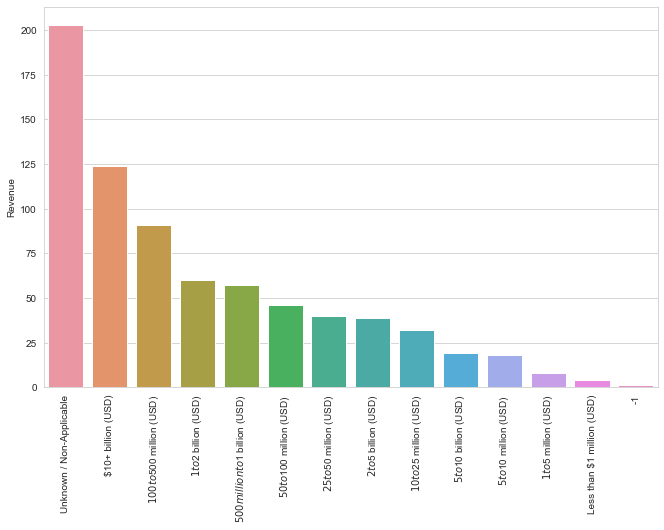

BarPlot for company_txt:


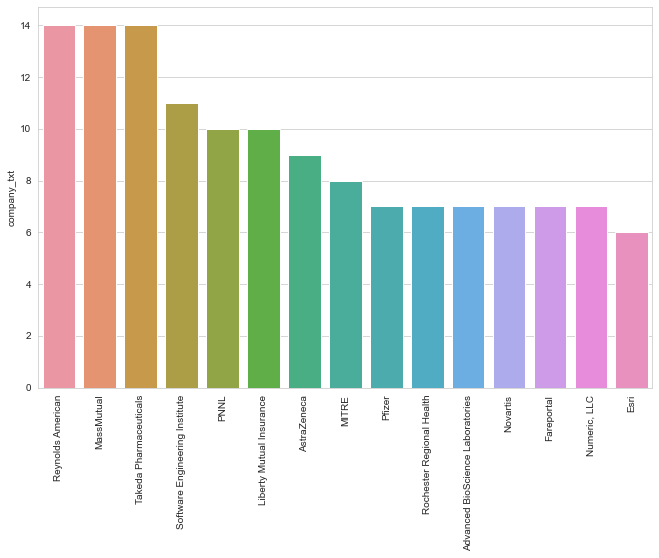

BarPlot for job_state:


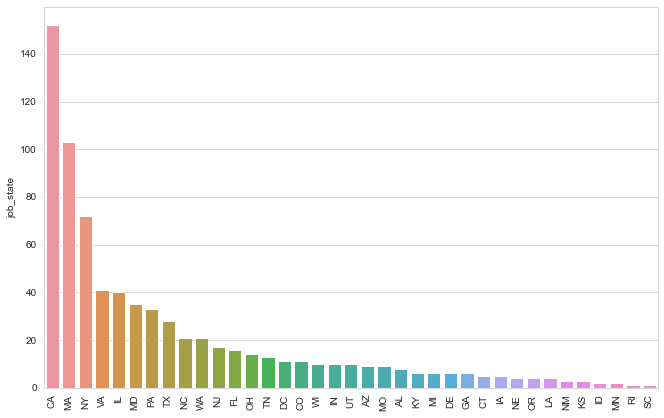

BarPlot for same_state:


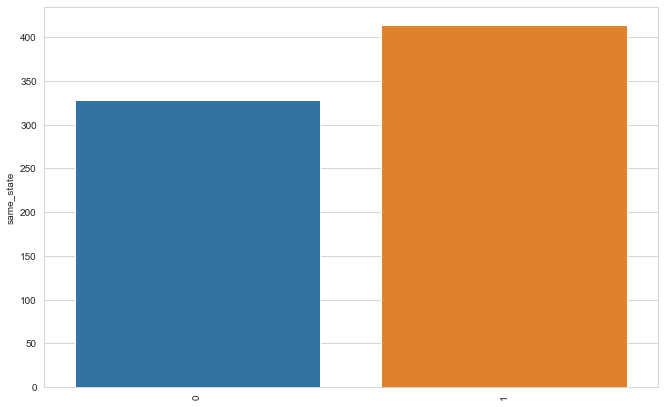

BarPlot for python_yn:


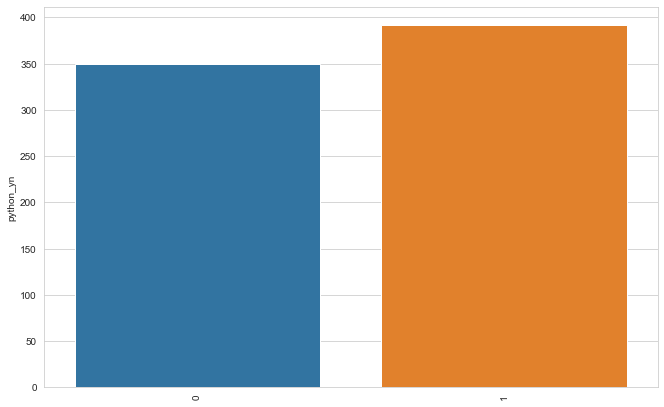

BarPlot for R_yn:


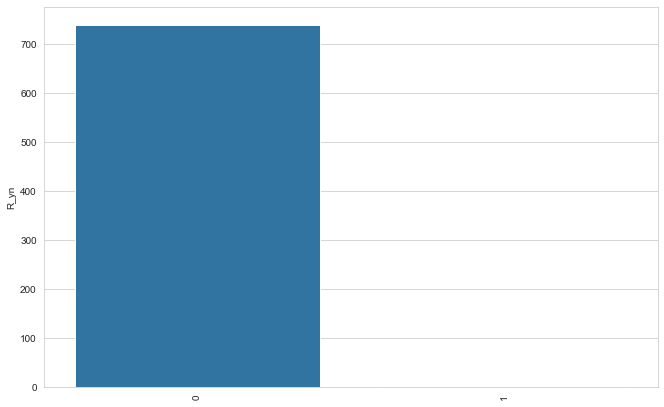

BarPlot for spark:


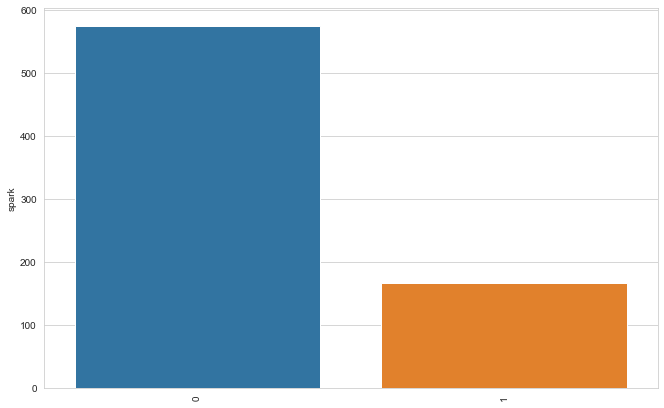

BarPlot for aws:


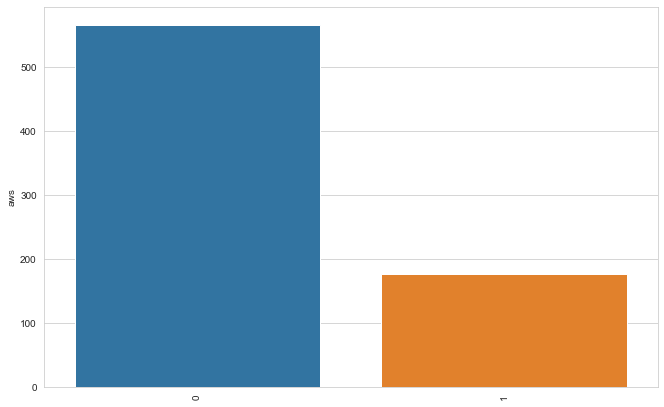

BarPlot for excel:


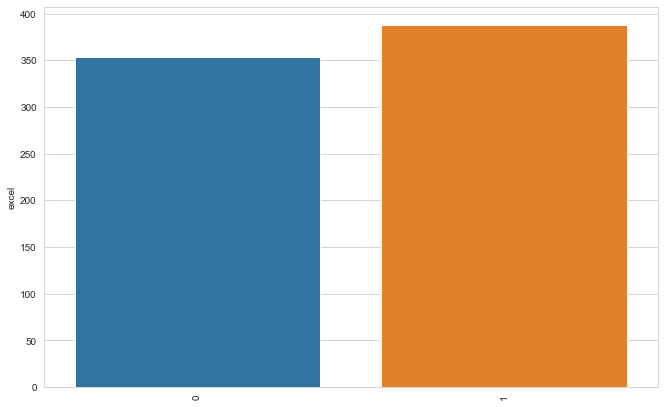

BarPlot for job_simp:


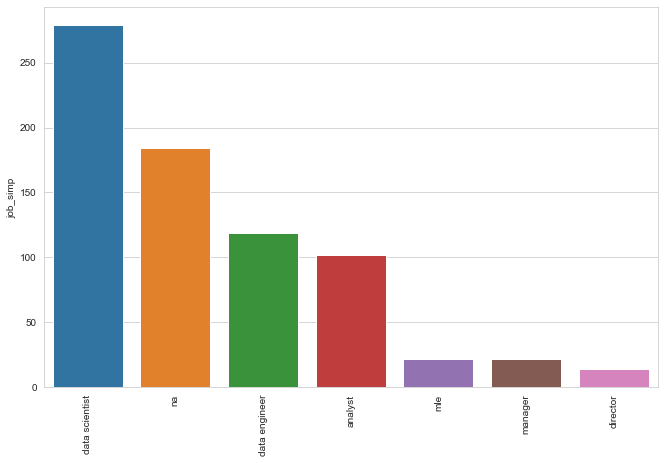

BarPlot for seniority:


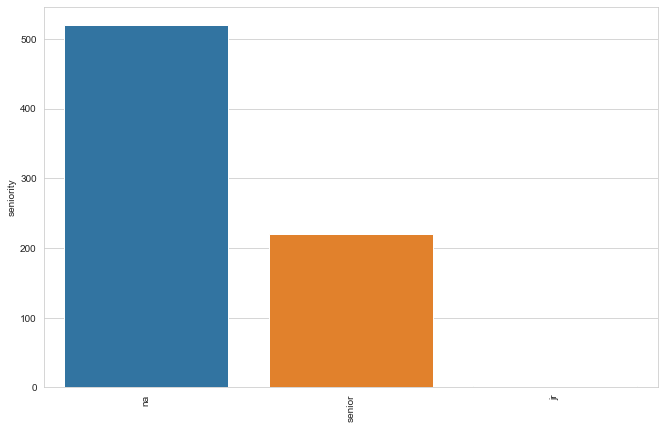

In [14]:
# Analysing categorical features of the df
for column in df:
    if column in ['Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_state','same_state', 
                  'job_simp', 'seniority', 'python_yn', 'R_yn', 'spark', 'aws', 'excel']:
        plt.figure(figsize=(11,7))
        print('BarPlot for {}:'.format(column))
        bar = sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts())
        bar.set_xticklabels(bar.get_xticklabels(), rotation=90)
        plt.show()
    if column in ['Location', 'Headquarters', 'company_txt']:
        plt.figure(figsize=(11,7))
        print('BarPlot for {}:'.format(column))
        bar = sns.barplot(x=df[column].value_counts()[:15].index, y=df[column].value_counts()[:15])
        bar.set_xticklabels(bar.get_xticklabels(), rotation=90)
        plt.show()

In [15]:
# jobtitle vs avg_salary
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [16]:
# avg_salary vs state
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state',
               values = 'avg_salary').sort_values('avg_salary')

,avg_salary
job_state,
AZ,69.500000
NM,74.333333
GA,81.333333
KY,84.000000
CT,84.000000
IN,84.500000
TN,96.000000
FL,97.357143
OR,98.500000


In [17]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

# avg_salary vs state vs jobtitle
pd.pivot_table(df, index=['job_state','job_simp'], values='avg_salary').sort_values('job_state')

avg_salary
job_state job_simp                  
AL        analyst          62.200000
          data engineer    65.000000
          na               43.750000
AZ        analyst          55.000000
          data engineer    79.500000
          data scientist   69.500000
          na              124.500000
CA        mle             177.300000
          manager          80.611111
          na               99.907407
          data engineer   129.540000
          analyst          85.250000
          data scientist  142.522059
CO        analyst          29.500000
          data engineer    99.000000
          data scientist  108.666667
          mle             100.500000
          na               31.500000
CT        data scientist   84.000000
          na               62.500000
DC        analyst          63.500000
          data engineer    85.000000
          data scientist  149.000000
DE        na               27.500000
FL        data engineer    91.833333
          data scientist   97.357143
          analyst          47.500000
GA        data scientist   81.333333
          na               80.000000
IA        analyst          43.000000
          data engineer   102.833333
ID        analyst          56.250000
IL        na               57.166667
          analyst          66.500000
          data engineer    96.125000
          data scientist  117.233333
          director        221.750000
          mle             133.000000
IN        na               69.000000
          data scientist   84.500000
          data engineer   114.500000
KS        mle              87.000000
KY        data scientist   84.000000
          na              103.500000
LA        analyst          48.000000
          data engineer    70.500000
          na               20.000000
MA        manager          71.900000
          director        117.833333
          na              107.478261
          data engineer   107.291667
          analyst          59.125000
          data scientist  113.750000
MD        data scientist  109.115385
          na               88.750000
          analyst          80.666667
          data engineer   109.000000
MI        data scientist  106.625000
          manager          87.500000
MN        analyst          76.000000
          data engineer    95.000000
MO        analyst          61.000000
          data scientist  127.666667
          manager          40.500000
          na               72.333333
NC        data engineer   104.250000
          data scientist  117.000000
          na               90.916667
NE        na               41.000000
NJ        na               82.500000
          manager         109.500000
          director        161.500000
          data engineer   112.000000
          data scientist  106.875000
          analyst          83.583333
NM        data scientist   74.333333
NY        analyst          65.607143
          data engineer    86.375000
          data scientist  115.250000
          mle             125.000000
          na               81.583333
OH        na               91.166667
          analyst          53.875000
          data scientist  105.285714
OR        data scientist   98.500000
          data engineer    73.000000
PA        analyst          62.750000
          data engineer    91.500000
          data scientist  113.333333
          manager         109.666667
          mle             120.500000
          na               76.062500
RI        analyst         100.000000
SC        na               60.500000
TN        analyst          13.500000
          data engineer   100.950000
          data scientist   96.000000
TX        data scientist  100.730769
          na               41.285714
          data engineer   113.062500
UT        analyst          54.750000
          data engineer   100.333333
          data scientist  140.500000
VA        analyst          71.583333
          data engineer    96.900000
          data scientist  108.416667
          mle              87.

In [18]:
# Pivot tables for categorical columns vs avg_salary
for column in df:
    if column in ['Rating', 'Industry', 'Sector', 'Revenue', 'employer_provided','python_yn', 'R_yn', 
                  'spark', 'aws', 'excel', 'Type of ownership']:
        print('Pivot Table for {}:'.format(column))
        print(pd.pivot_table(df, index=column, values='avg_salary').sort_values('avg_salary', ascending = False))
        print('')

Pivot Table for Rating:
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286

Pivot Table for Type of ownership:
                                avg_salary
Type of ownership                         
-1                              117.500000
Company - Public                110.893782
Subsidiary or Business Segment  110.573529
College / University            107.615385
Company - Private               101.776829
Government  